### Prepare a model for glass classification using KNN

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 

#### importing Dataset 

In [2]:
data = pd.read_csv('F://Data_Set/glass.csv') 

In [3]:
data.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Dataset Information 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Check any Null Value Present in the Dataset or Not 

In [5]:
data.isnull().sum() 

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
data.shape 

(214, 10)

description of the Dataset 

In [5]:
data.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Cluster Representation of Given Dataset 

Parallel Coordinates Plot 

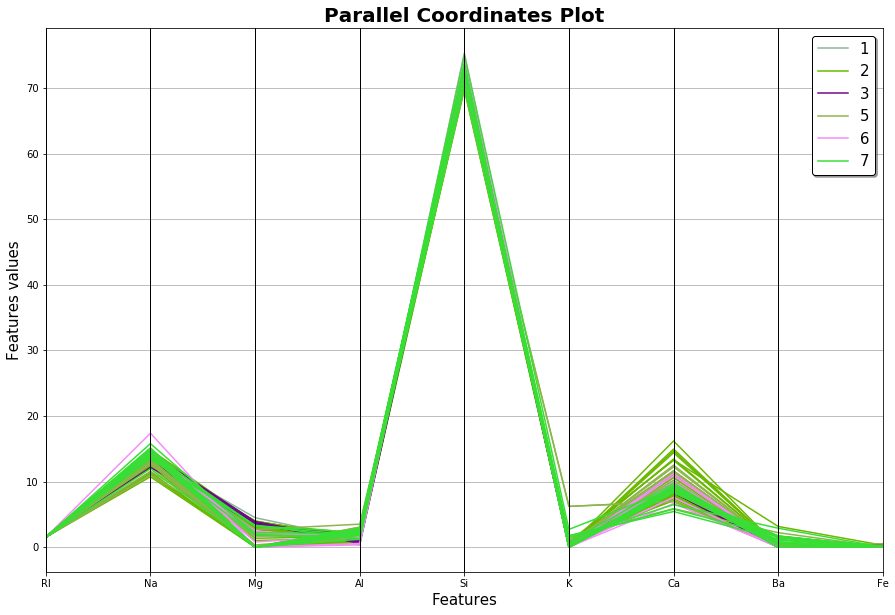

In [36]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(data, "Type") 
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### Check any Outlier Present in Our Dataset or Not by Using BoxPlot 

Boxplot of RI Column 

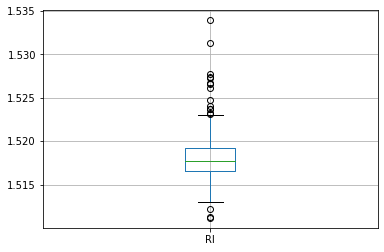

In [10]:
data.boxplot(column=['RI']) 

BoxPlot of Na Column 

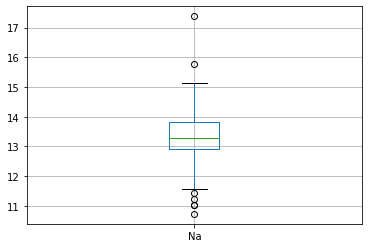

In [11]:
data.boxplot(column=['Na']) 

BoxPlot of Mg Column 

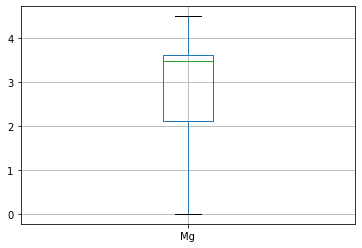

In [12]:
data.boxplot(column=['Mg'])   

BoxPlot of Al Column 

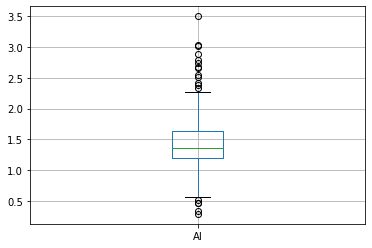

In [13]:
data.boxplot(column=['Al']) 

BoxPlot of Si Column 

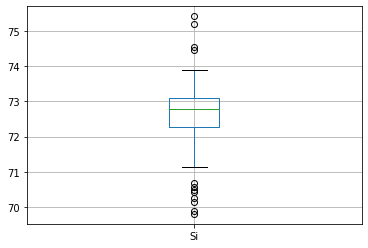

In [14]:
data.boxplot(column=['Si']) 

BoxPlot of K Column 

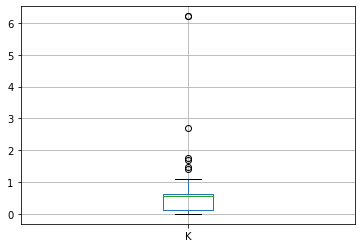

In [15]:
data.boxplot(column=['K']) 

BoxPlot of Ca Column  

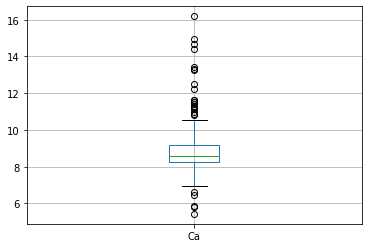

In [16]:
data.boxplot(column=['Ca']) 

BoxPlot of Ba Column 

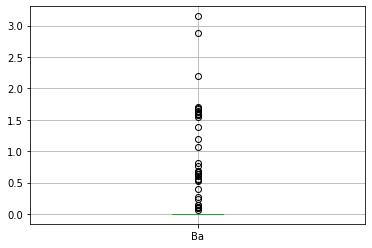

In [17]:
data.boxplot(column=['Ba']) 

BoxPlot of Fe Column 

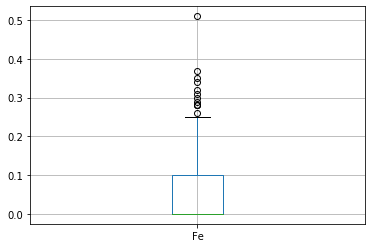

In [18]:
data.boxplot(column=['Fe']) 

#### Remove the Outliers from the Dataset 

In [6]:
new_dataset = data.copy() 

In [7]:
new_dataset.shape 

(214, 10)

Remove Outliers from the RI Column 

In [8]:
Upper_limit = new_dataset.RI.mean()+1*new_dataset.RI.std() 
print('Upper Limit of RI Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.RI.mean()-1*new_dataset.RI.std()
print('Lower Limit of RI Column = {}'.format(Lower_limit)) 

RI_outlier = new_dataset[(new_dataset.RI>Upper_limit) | (new_dataset.RI<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of RI Columns is = {}'.format(RI_outlier.shape))

new_Dataset = new_dataset[(new_dataset.RI<Upper_limit)&(new_dataset.RI>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of RI Column = 1.5214022843001322
Lower Limit of RI Column = 1.5153285568213615
Outliers Shape of RI Columns is = (44, 10)
Shape of new_Dataset is = (170, 10)


Remove Outliers from Na Column 

In [9]:
Upper_limit = new_dataset.Na.mean()+1*new_dataset.Na.std() 
print('Upper Limit of Na Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.Na.mean()-1*new_dataset.Na.std()
print('Lower Limit of Na Column = {}'.format(Lower_limit)) 

Na_outlier = new_dataset[(new_dataset.Na>Upper_limit) | (new_dataset.Na<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of Na Columns is = {}'.format(Na_outlier.shape))

new_Dataset = new_dataset[(new_dataset.Na<Upper_limit)&(new_dataset.Na>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of Na Column = 14.224454023004705
Lower Limit of Na Column = 12.591246911574741
Outliers Shape of Na Columns is = (47, 10)
Shape of new_Dataset is = (167, 10)


Remove Outliers from Al Column 

In [10]:
Upper_limit = new_dataset.Al.mean()+1*new_dataset.Al.std() 
print('Upper Limit of Al Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.Al.mean()-1*new_dataset.Al.std()
print('Lower Limit of Al Column = {}'.format(Lower_limit)) 

Al_outlier = new_dataset[(new_dataset.Al>Upper_limit) | (new_dataset.Al<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of Al Columns is = {}'.format(Al_outlier.shape))

new_Dataset = new_dataset[(new_dataset.Al<Upper_limit)&(new_dataset.Al>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of Al Column = 1.9441761876565598
Lower Limit of Al Column = 0.9456368964555906
Outliers Shape of Al Columns is = (56, 10)
Shape of new_Dataset is = (158, 10)


Remove Outliers from Si Column 

In [11]:
Upper_limit = new_dataset.Si.mean()+1*new_dataset.Si.std() 
print('Upper Limit of Si Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.Si.mean()-1*new_dataset.Si.std()
print('Lower Limit of Si Column = {}'.format(Lower_limit)) 

Si_outlier = new_dataset[(new_dataset.Si>Upper_limit) | (new_dataset.Si<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of Si Columns is = {}'.format(Si_outlier.shape))

new_Dataset = new_dataset[(new_dataset.Si<Upper_limit)&(new_dataset.Si>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of Si Column = 73.42548037420437
Lower Limit of Si Column = 71.87638878467413
Outliers Shape of Si Columns is = (43, 10)
Shape of new_Dataset is = (171, 10)


Remove Outliers from the K Column 

In [12]:
Upper_limit = new_dataset.K.mean()+1*new_dataset.K.std() 
print('Upper Limit of K Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.K.mean()-1*new_dataset.K.std()
print('Lower Limit of K Column = {}'.format(Lower_limit)) 

K_outlier = new_dataset[(new_dataset.K>Upper_limit) | (new_dataset.K<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of K Columns is = {}'.format(K_outlier.shape))

new_Dataset = new_dataset[(new_dataset.K<Upper_limit)&(new_dataset.K>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of K Column = 1.1492479203253352
Lower Limit of K Column = -0.1551357707926253
Outliers Shape of K Columns is = (7, 10)
Shape of new_Dataset is = (207, 10)


Remove Outliers form Ca Column 

In [13]:
Upper_limit = new_dataset.Ca.mean()+1*new_dataset.Ca.std() 
print('Upper Limit of Ca Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.Ca.mean()-1*new_dataset.Ca.std()
print('Lower Limit of Ca Column = {}'.format(Lower_limit)) 

Ca_outlier = new_dataset[(new_dataset.Ca>Upper_limit) | (new_dataset.Ca<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of Ca Columns is = {}'.format(Ca_outlier.shape))

new_Dataset = new_dataset[(new_dataset.Ca<Upper_limit)&(new_dataset.Ca>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of Ca Column = 10.380116104103825
Lower Limit of Ca Column = 7.533809129541035
Outliers Shape of Ca Columns is = (31, 10)
Shape of new_Dataset is = (183, 10)


Remove the Outliers from Ba Column 

In [14]:
Upper_limit = new_dataset.Ba.mean()+1*new_dataset.Ba.std() 
print('Upper Limit of Ba Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.Ba.mean()-1*new_dataset.Ba.std()
print('Lower Limit of Ba Column = {}'.format(Lower_limit)) 

Ba_outlier = new_dataset[(new_dataset.Ba>Upper_limit) | (new_dataset.Ba<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of Ba Columns is = {}'.format(Ba_outlier.shape))

new_Dataset = new_dataset[(new_dataset.Ba<Upper_limit)&(new_dataset.Ba>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of Ba Column = 0.6722659895716663
Lower Limit of Ba Column = -0.32217253162774095
Outliers Shape of Ba Columns is = (19, 10)
Shape of new_Dataset is = (195, 10)


Remove Outliers from Fe Column 

In [15]:
Upper_limit = new_dataset.Fe.mean()+1*new_dataset.Fe.std() 
print('Upper Limit of Fe Column = {}'.format(Upper_limit))

Lower_limit = new_dataset.Fe.mean()-1*new_dataset.Fe.std()
print('Lower Limit of Fe Column = {}'.format(Lower_limit)) 

Fe_outlier = new_dataset[(new_dataset.Fe>Upper_limit) | (new_dataset.Fe<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of Fe Columns is = {}'.format(Fe_outlier.shape))

new_Dataset = new_dataset[(new_dataset.Fe<Upper_limit)&(new_dataset.Fe>Lower_limit)]

print('Shape of new_Dataset is = {}'.format(new_Dataset.shape)) 

Upper Limit of Fe Column = 0.15444804643089335
Lower Limit of Fe Column = -0.04042935484210835
Outliers Shape of Fe Columns is = (38, 10)
Shape of new_Dataset is = (176, 10)


In [16]:
dataset_1 = new_Dataset.copy() 

#### Split the Dataset into Dependent and Independent Variable 

Independent Variable 

In [17]:
x = dataset_1.iloc[:,0:9].values 

In [18]:
y= dataset_1.iloc[:,-1].values   

#### Dividing the dataset into Traning Set and Test Set 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1) 

#### Applay KNN Algorithm for Classification 

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)  

In [21]:
knn_classifier.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Predict the Result of Test Set 

In [22]:
y_pred = knn_classifier.predict(x_test) 

In [23]:
y_pred 

array([2, 1, 1, 2, 1, 7, 2, 1, 5, 2, 1, 2, 2, 1, 7, 1, 6, 1, 1, 1, 1, 1,
       7, 2, 1, 5, 2, 1, 1, 5, 7, 7, 1, 2, 7, 2], dtype=int64)

#### Check the Confusion Matrix of Model 

In [24]:
from sklearn.metrics import confusion_matrix 

In [25]:
cm = confusion_matrix(y_test,y_pred) 

In [26]:
cm 

array([[11,  3,  0,  0,  0,  0],
       [ 1,  7,  0,  2,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  1,  4]], dtype=int64)

#### Check Accuracy of the Model by Using Accuracy Matrix

In [27]:
from sklearn.metrics import accuracy_score 

In [28]:
ac = accuracy_score(y_test,y_pred) 

In [29]:
ac 

0.6111111111111112

#### Classification Report of Mode

In [30]:
from sklearn.metrics import classification_report 

In [33]:
cr = classification_report(y_test,y_pred) 

cr 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.69      0.79      0.73        14\n           2       0.70      0.70      0.70        10\n           3       0.00      0.00      0.00         3\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         0\n           7       0.67      0.57      0.62         7\n\n    accuracy                           0.61        36\n   macro avg       0.34      0.34      0.34        36\nweighted avg       0.59      0.61      0.60        36\n'

#### Comparing error Rate with K Value 

In [34]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test)) 

Text(0, 0.5, 'Mean Error')

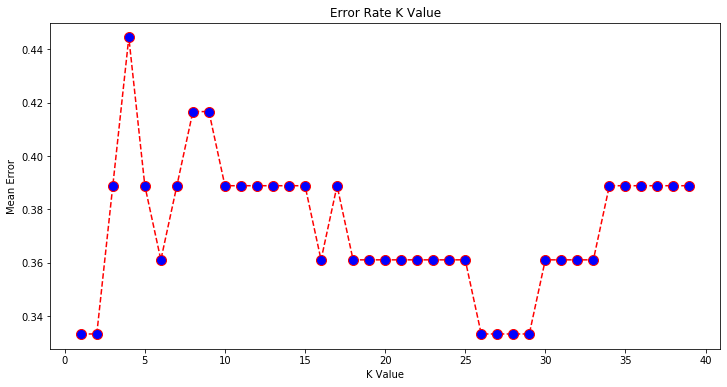

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Grid Search Algorithm Tuning 

In [33]:
dataset_3 = new_Dataset.copy() 

In [35]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 

In [36]:
n_neighbors = np.array(range(1,31))
param_grid = dict(n_neighbors=n_neighbors) 

In [37]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y) 

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print(grid.best_score_)
print(grid.best_params_)

0.6544444444444445
{'n_neighbors': 14}


#### Visualizing the CV results

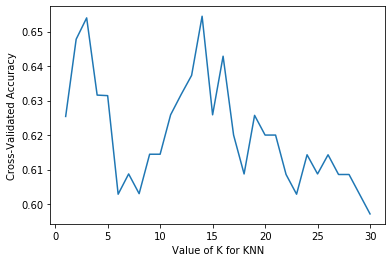

In [39]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show() 

### KNN Algorithm Using Log Transformation of Dataset

In [37]:
dataset_4 = new_Dataset.copy()

In [38]:
dataset_4.shape

(176, 10)

In [39]:
dataset_4.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Log Transformation of Dataset 

In [40]:
dataset_4['RI'] = np.log(dataset_4['RI']+1) 
dataset_4['Na'] = np.log(dataset_4['Na']+1)
dataset_4['Mg'] = np.log(dataset_4['Mg']+1)
dataset_4['Al'] = np.log(dataset_4['Al']+1) 
dataset_4['Si'] = np.log(dataset_4['Si']+1) 
dataset_4['K'] = np.log(dataset_4['K']+1) 
dataset_4['Ca'] = np.log(dataset_4['Ca']+1) 
dataset_4['Ba'] = np.log(dataset_4['Ba']+1) 
dataset_4['Fe'] = np.log(dataset_4['Fe']+1) 

In [41]:
 dataset_4.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.924660,2.683758,1.702928,0.741937,4.287441,0.058269,2.277267,0.0,0.0,1
1,0.923310,2.700690,1.526056,0.858662,4.300410,0.392042,2.178155,0.0,0.0,1
2,0.922742,2.676215,1.515127,0.932164,4.303930,0.329304,2.172476,0.0,0.0,1
3,0.923330,2.653946,1.545433,0.828552,4.298781,0.451076,2.221375,0.0,0.0,1
4,0.923235,2.658159,1.530395,0.806476,4.305146,0.438255,2.204972,0.0,0.0,1


#### Divide the Dataset in to Dependent and Independent Variable 

Indepndent Variable 

In [42]:
X1 = dataset_4.iloc[:,0:9].values 

In [43]:
Y1 = dataset_4.iloc[:,-1].values 

#### Split the dataset into Traning Set and testing Set 

In [44]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.25,random_state=1) 

#### Applay KNN Algorithm for Classification

In [45]:
knn_classifier1 = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=3) 

In [46]:
knn_classifier1.fit(x1_train,y1_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=3,
                     weights='uniform')

#### Predict the Result of Test Set

In [47]:
y_pred1 = knn_classifier1.predict(x1_test)  

In [48]:
y_pred1 

array([2, 1, 1, 2, 1, 5, 2, 1, 5, 2, 1, 1, 2, 1, 7, 1, 2, 1, 1, 1, 1, 2,
       7, 2, 1, 2, 1, 1, 1, 5, 7, 7, 1, 1, 7, 1, 2, 2, 2, 1, 1, 2, 1, 1],
      dtype=int64)

#### Check the Confusion Matrix of model 

In [49]:
from sklearn.metrics import confusion_matrix 

In [50]:
cm = confusion_matrix(y1_test,y_pred1) 

In [51]:
cm 

array([[17,  0,  0,  0,  0,  0],
       [ 2, 11,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  4]], dtype=int64)

#### Check the Accuracy Model 

In [52]:
from sklearn.metrics import accuracy_score 

In [53]:
ac = accuracy_score(y1_test,y_pred1)  

In [54]:
ac 

0.75

#### Comparing error Rate with K Value

In [55]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train, y1_train) 
    pred_i = knn.predict(x1_test)
    error.append(np.mean(pred_i != y1_test))  

Text(0, 0.5, 'Mean Error')

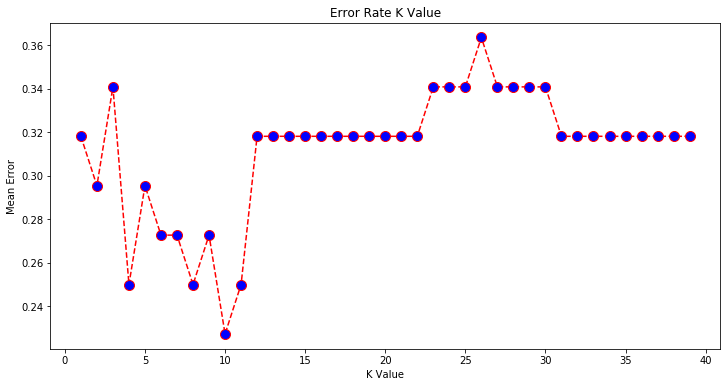

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')